In [1]:
import pandas as pd

In [2]:
from mcc_f1 import *

## Method 1: Read featurised pass data from EPL 2020/21 season

In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [10]:
# read featurised pass data (generated using ai-soccer-pass-completion-model/src/models/inference_xpass.py)
feature_df = pd.read_csv('/Users/joe.gallagher/ai-soccer-pass-completion-model/data/featurised/featurised_39_2020.csv')

In [11]:
feature_df.shape

(387689, 81)

In [12]:
# feature_df.columns

In [13]:
input_features_1 = [
    'x_normalized_to_inversion',
    'y_abs',
    'hd_pass',
    'corner',
    'throw',
    'gk',
    'kick_off',
    'lofted',
]

input_features_2 = [
    'x_normalized_to_inversion',
    'y_abs',
    'angle_normalized_to_inversion',
    'long',
    'mid',
    'hd_pass',
    'corner',
    'throw',
    'gk',
    'kick_off',
    'lofted',
]

input_features_3 = [
    'x_normalized_to_inversion',
    'y_abs',
    'endx',
    'endy',
    'hd_pass',
    'corner',
    'throw',
    'gk',
    'kick_off',
    'lofted',
]

target_feature_column = ['outcome']

In [ ]:
# 1. Simple model

# training, validation sets
train_1, test_1 = train_test_split(feature_df, train_size=0.7, random_state=19)
X_train_1 = train_1[input_features_1]
y_train_1 = train_1[target_feature_column]
X_test_1 = test_1[input_features_1]
y_test_1 = test_1[target_feature_column]
eval_set_1 = [(X_train_1, y_train_1), (X_test_1, y_test_1)]

# fit model
model_obj_1 = XGBRegressor(
    objective='binary:logistic',
    random_state=19,
    verbosity=0,
    n_jobs=-1)

xgb_1 = model_obj_1.fit(
    X_train_1, y_train_1,
    eval_metric=["error", "logloss", "auc"],
    eval_set=eval_set_1,
    verbose=False)

In [ ]:
# 2. More complex model

# training, validation sets
train_2, test_2 = train_test_split(feature_df, train_size=0.7, random_state=19)
X_train_2 = train_2[input_features_2]
y_train_2 = train_2[target_feature_column]
X_test_2 = test_2[input_features_2]
y_test_2 = test_2[target_feature_column]
eval_set_2 = [(X_train_2, y_train_2), (X_test_2, y_test_2)]

# fit model
model_obj_2 = XGBRegressor(
    objective='binary:logistic',
    random_state=19,
    verbosity=0,
    n_jobs=-1)

xgb_2 = model_obj_2.fit(
    X_train_2, y_train_2,
    eval_metric=["error", "logloss", "auc"],
    eval_set=eval_set_2,
    verbose=False)

In [ ]:
# 3. More complex model including data leakage

# training, validation sets
train_3, test_3 = train_test_split(feature_df, train_size=0.7, random_state=19)
X_train_3 = train_3[input_features_3]
y_train_3 = train_3[target_feature_column]
X_test_3 = test_3[input_features_3]
y_test_3 = test_3[target_feature_column]
eval_set_3 = [(X_train_3, y_train_3), (X_test_3, y_test_3)]

# fit model
model_obj_3 = XGBRegressor(
    objective='binary:logistic',
    random_state=19,
    verbosity=0,
    n_jobs=-1)

xgb_3 = model_obj_3.fit(
    X_train_3, y_train_3,
    eval_metric=["error", "logloss", "auc"],
    eval_set=eval_set_3,
    verbose=False)

In [ ]:
predicted_1 = xgb_1.predict(X_test_1)
predicted_2 = xgb_2.predict(X_test_2)
predicted_3 = xgb_3.predict(X_test_3)

actual_1 = np.array(y_test_1)[:,0]
actual_2 = np.array(y_test_2)[:,0]
actual_3 = np.array(y_test_3)[:,0]

In [ ]:
pd.Series(actual_1).hist(alpha=0.5)
pd.Series(predicted_1).hist(alpha=0.5)
pd.Series(predicted_2).hist(alpha=0.5)
pd.Series(predicted_3).hist(alpha=0.5)

In [ ]:
plot_mccf1(actual_1, predicted_1, n_bins=100)

In [ ]:
mcc_f1_score_1, best_threshold_1 = calc_mccf1(actual_1, predicted_1, 100)

In [ ]:
print(f'MCC-F1 score = {mcc_f1_score_1:.3f}')
print(f'Best threshold = {best_threshold_1:.3f}')

In [ ]:
plot_mccf1(actual_2, predicted_2, n_bins=100)

In [ ]:
mcc_f1_score_2, best_threshold_2 = calc_mccf1(actual_2, predicted_2, 100)

In [ ]:
print(f'MCC-F1 score = {mcc_f1_score_2:.3f}')
print(f'Best threshold = {best_threshold_2:.3f}')

In [ ]:
plot_mccf1(actual_3, predicted_3, n_bins=100)

In [ ]:
mcc_f1_score_3, best_threshold_3 = calc_mccf1(actual_3, predicted_3, 100)

In [ ]:
print(f'MCC-F1 score = {mcc_f1_score_3:.3f}')
print(f'Best threshold = {best_threshold_3:.3f}')

## Method 2: Read pre-generated predictions from full xP model

In [3]:
xp_df = pd.read_csv("runtime/xp_39_2020.csv")

In [4]:
actual = np.array(xp_df.outcome)
predicted = np.array(xp_df.xP)

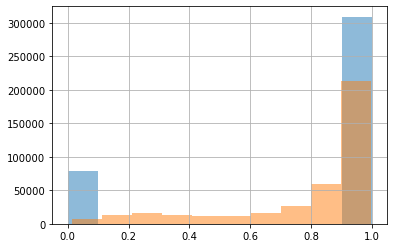

In [5]:
pd.Series(actual).hist(alpha=0.5)
pd.Series(predicted).hist(alpha=0.5)

/Users/joe.gallagher/Dropbox/mcc-f1-metric/mcc_f1.py:76: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/Users/joe.gallagher/Dropbox/mcc-f1-metric/mcc_f1.py:134: RuntimeWarning: invalid value encountered in double_scalars
  mean_distances_left.append(sum_of_distance_within_subrange / np.sum(idx))
/Users/joe.gallagher/Dropbox/mcc-f1-metric/mcc_f1.py:140: RuntimeWarning: invalid value encountered in greater_equal
  idx = (mcc_right >= min(mcc) + (i - 1) * unit_len) & (mcc_right <= min(mcc) + i * unit_len)
/Users/joe.gallagher/Dropbox/mcc-f1-metric/mcc_f1.py:140: RuntimeWarning: invalid value encountered in less_equal
  idx = (mcc_right >= min(mcc) + (i - 1) * unit_len) & (mcc_right <= min(mcc) + i * unit_len)
/Users/joe.gallagher/Dropbox/mcc-f1-metric/mcc_f1.py:148: RuntimeWarning: invalid value encountered in double_scalars
  mean_distances_right.append(sum_of_distance_within_subrange / np.sum(idx))


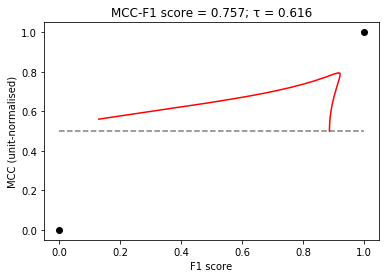

In [6]:
plot_mccf1(actual, predicted, n_bins=100)

In [7]:
mcc_f1_score, best_threshold = calc_mccf1(actual, predicted, 100)

In [8]:
print(f'MCC-F1 score = {mcc_f1_score:.3f}')
print(f'Best threshold = {best_threshold:.3f}')

MCC-F1 score = 0.757
Best threshold = 0.616
